<a href="https://colab.research.google.com/github/felipesayegg/Kmeans_Female_Male/blob/main/CP2_Kmeans_CPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Introdução**


### 🧠 CP05 - Clusterização com KMeans: Height & Weight Dataset

Este projeto tem como objetivo aplicar um pipeline completo de **Machine Learning não supervisionado** usando o algoritmo **KMeans**, com foco em **clusterização** de dados relacionados à altura, peso e gênero de indivíduos.

Utilizamos o dataset `Height Weight KNN Dataset`, que contém 8.555 registros com as seguintes colunas:
- `Gender` (Masculino ou Feminino)
- `Height` (Altura em polegadas)
- `Weight` (Peso em libras)

O grande desafio aqui é **descobrir padrões naturais nos dados sem usar o gênero como entrada**, apenas utilizando as variáveis numéricas `Height` e `Weight`. Depois, comparamos os grupos gerados com o gênero real para entender a eficácia da separação.

---

## ✅ Etapas do Projeto

### 1. Entendimento do Negócio
- Compreensão do objetivo: agrupar dados com KMeans e analisar se os grupos formados correspondem aos gêneros reais.
- Discussão sobre aprendizado não supervisionado e o papel do KMeans.

### 2. Importação e Análise Exploratória
- Carregamento do dataset
- Visualização das primeiras linhas
- Verificação de tipos de dados, estatísticas descritivas e valores ausentes

### 3. Pré-processamento
- Padronização das variáveis numéricas com `StandardScaler` (essencial para KMeans)
- Codificação da variável `Gender` apenas para fins de análise posterior

### 4. Clusterização com KMeans
- Aplicação do algoritmo `KMeans` para agrupar os dados
- Uso do **Método do Cotovelo (Elbow Method)** para determinar o melhor valor de `k`
- Validação complementar com **Silhouette Score**

### 5. Análise dos Resultados
- Comparação dos clusters formados com os gêneros reais
- Avaliação da separabilidade dos dados com base em altura e peso

### 6. Visualizações
- Gráficos de dispersão dos clusters usando `matplotlib` e `seaborn`
- Visualização clara dos agrupamentos

### 7. Aplicação de PCA (Principal Component Analysis)
- Redução de dimensionalidade para facilitar a visualização dos clusters
- Análise visual em outro sistema de coordenadas (PC1 e PC2)

---

## 💡 Por que aprendizado não supervisionado é importante no mercado?

O aprendizado não supervisionado permite que algoritmos descubram **padrões e estruturas ocultas** nos dados **sem precisar de rótulos pré-definidos**. Essa abordagem é essencial quando não sabemos previamente as categorias existentes.

### ✳️ Principais aplicações no mercado:

- **Marketing:** segmentação de clientes por comportamento de compra (Customer Segmentation)
- **Finanças:** detecção de fraudes ou perfis de crédito
- **Saúde:** agrupamento de pacientes com sintomas similares ou respostas a tratamentos
- **E-commerce:** recomendação de produtos com base em perfis de usuários
- **Indústria:** manutenção preditiva e agrupamento de falhas em máquinas
- **Ciência de dados exploratória:** quando queremos entender a estrutura interna de um novo conjunto de dados

O KMeans é amplamente utilizado por ser simples, eficiente e interpretável, especialmente como ponto de partida para análise exploratória e descoberta de padrões.

---

## 🎯 Conclusão Esperada
Ao final deste projeto, esperamos responder à pergunta:  
**“É possível separar homens e mulheres apenas com base em altura e peso, utilizando técnicas não supervisionadas de aprendizado de máquina?”**

Este exercício demonstra a capacidade de **detectar padrões ocultos nos dados**, além de reforçar conceitos fundamentais de clustering e análise exploratória.

---

## 🛠️ Tecnologias Utilizadas
- Python
- Pandas
- Scikit-learn
- Matplotlib
- Seaborn


# 1 - Importação e Análise Exploratória

In [17]:
# 📦 1. Importação das bibliotecas necessárias
# Vamos utilizar o pandas para carregar e analisar o dataset.
import pandas as pd

import matplotlib.pyplot as plt  # Matplotlib é uma biblioteca poderosa para criar gráficos em Python.
                                 # Aqui usamos o módulo 'pyplot', que facilita a criação de gráficos como boxplots, histogramas, scatter plots, etc.

import seaborn as sns            # Seaborn é uma biblioteca baseada no Matplotlib, mas com foco em gráficos mais bonitos e informativos.
                                 # Ela oferece visualizações estatísticas com temas e estilos já prontos, como boxplots e curvas de densidade.

# 🤖 Algoritmo de Clusterização
from sklearn.cluster import KMeans
# KMeans é o algoritmo de aprendizado não supervisionado que vamos usar para agrupar os dados
# Ele forma K grupos com base na distância entre os pontos (usando altura e peso no nosso caso)


# 📐 Avaliação dos Clusters
from sklearn.metrics import silhouette_score
# Silhouette Score mede o quão bem os pontos estão agrupados:
# valores próximos de 1 indicam boa separação entre os clusters

In [2]:
# 📥 2. Carregamento do dataset
# O arquivo 'weight-height.csv' já está no ambiente do Colab, então podemos carregá-lo diretamente.
# Esse dataset contém dados de altura, peso e gênero de indivíduos.
df = pd.read_csv('/content/weight-height.csv')

In [29]:

# 👀 3. Visualização inicial dos dados
# É sempre uma boa prática visualizar as primeiras linhas do dataset para entender a estrutura das colunas e os valores.
print("👁️ Primeiras 5 linhas do dataset:")
display(df.head(100))

👁️ Primeiras 5 linhas do dataset:


,Gender,Height,Weight,Gender_encoded,Cluster
0,Male,73.847017,241.893563,0,0
1,Male,68.781904,162.310473,0,0
2,Male,74.110105,212.740856,0,0
3,Male,71.730978,220.042470,0,0
4,Male,69.881796,206.349801,0,0
...,...,...,...,...,...
95,Male,65.117485,165.717112,0,1
96,Male,71.701234,193.094164,0,0
97,Male,66.832878,180.683887,0,0
98,Male,66.471275,172.773723,0,0


In [4]:
# 🧠 4. Informações gerais sobre o DataFrame
# Aqui vamos verificar o número de linhas e colunas, os tipos de dados de cada coluna,
# e se há alguma coluna com tipos inesperados.
print("\n📊 Informações do DataFrame:")
df.info()


📊 Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [5]:
# 📈 5. Estatísticas descritivas
# Agora vamos gerar estatísticas básicas como média, desvio padrão, mínimo, máximo, etc.
# Isso nos ajuda a entender melhor a distribuição dos dados.
print("\n📌 Estatísticas descritivas:")
display(df.describe())


📌 Estatísticas descritivas:


,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


## 📊 Análise Estatística Descritiva das Variáveis

Abaixo estão as principais estatísticas das duas variáveis numéricas do nosso dataset: **Height (altura)** e **Weight (peso)**.

### 📐 Height (Altura em polegadas)
- **Count (número de registros):** 8.555
- **Média (mean):** 66.81 polegadas (~1,70 metros)
- **Desvio padrão (std):** 3.85 — mostra que há uma variação razoável de altura entre os indivíduos.
- **Mínimo (min):** 54.62 polegadas (~1,39 metros)
- **Máximo (max):** 80.45 polegadas (~2,04 metros)
- **Quartis:**
  - 25% dos dados estão abaixo de **63.96** polegadas (~1,62 m)
  - 50% (mediana) = **66.99** polegadas (~1,70 m)
  - 75% estão abaixo de **69.60** polegadas (~1,77 m)

### ⚖️ Weight (Peso em libras)
- **Count (número de registros):** 8.555
- **Média (mean):** 165.63 libras (~75 kg)
- **Desvio padrão (std):** 32.04 — indica bastante variação de peso.
- **Mínimo (min):** 65.78 libras (~29.8 kg)
- **Máximo (max):** 269.99 libras (~122.5 kg)
- **Quartis:**
  - 25% estão abaixo de **139.88** libras (~63.5 kg)
  - Mediana = **168.52** libras (~76.4 kg)
  - 75% abaixo de **190.67** libras (~86.5 kg)

### 🧠 Conclusões:
- A maioria das pessoas do dataset tem entre **1,62m e 1,77m** de altura, e entre **63 kg e 86 kg** de peso.
- As duas variáveis têm uma distribuição aparentemente normal com uma leve dispersão.
- Essas estatísticas são úteis para termos uma noção do perfil físico geral da população analisada antes de aplicar o algoritmo de agrupamento.



In [6]:
# 🔍 6. Verificação de valores nulos
# É essencial checar se existem valores ausentes, pois isso pode impactar o funcionamento dos algoritmos de ML.
print("\n🧼 Verificando valores nulos:")
print(df.isnull().sum())


🧼 Verificando valores nulos:
Gender    0
Height    0
Weight    0
dtype: int64


<ipython-input-11-b1b4a9f7f732>:11: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


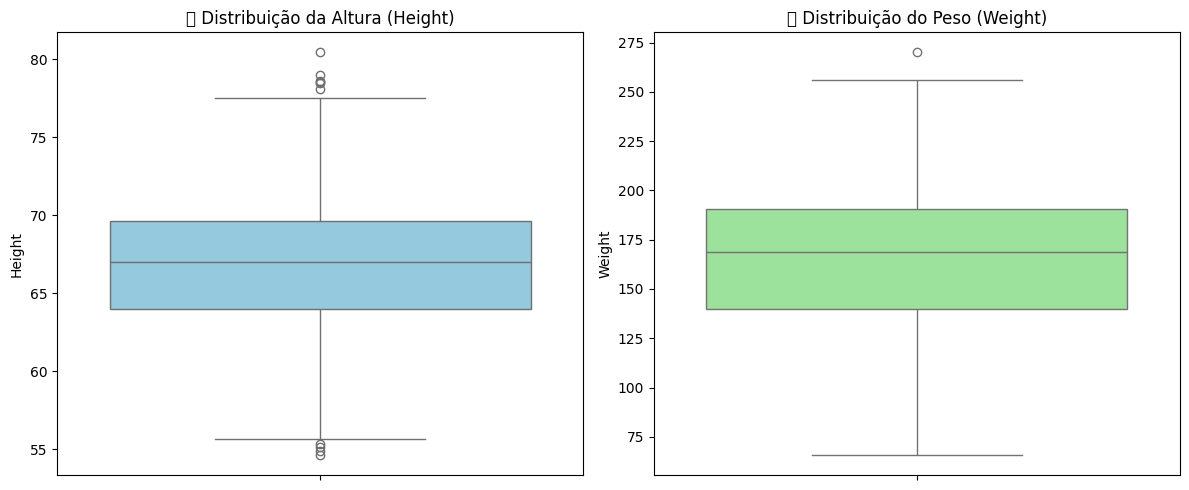

In [11]:
# 🎁 Boxplots para altura e peso
plt.figure(figsize=(12, 5))
# Boxplot para Altura
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Height"], color="skyblue")
plt.title("📦 Distribuição da Altura (Height)")
# Boxplot para Peso
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Weight"], color="lightgreen")
plt.title("📦 Distribuição do Peso (Weight)")
plt.tight_layout()
plt.show()

<ipython-input-12-0bc9ccaf3b54>:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


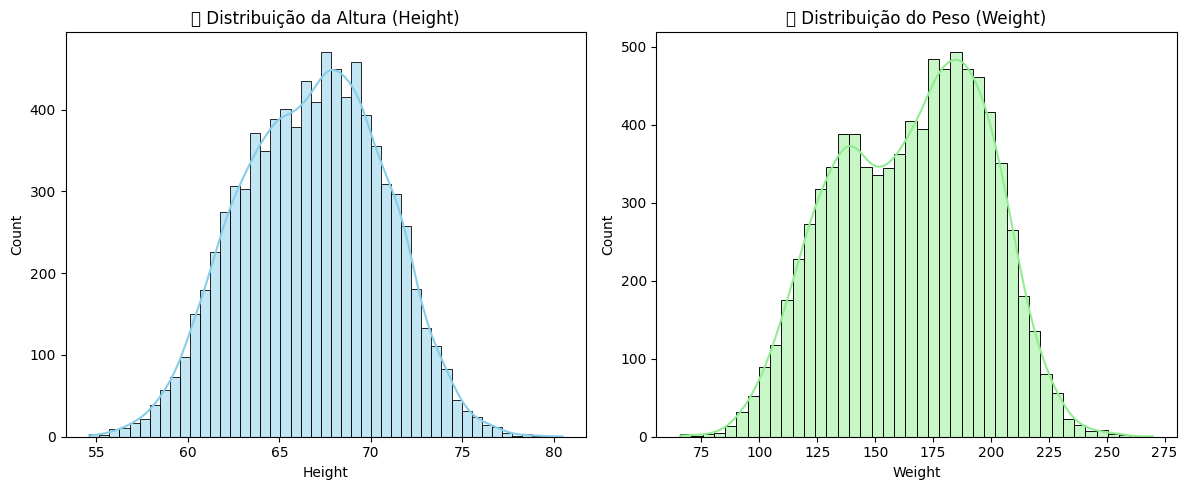

In [12]:
plt.figure(figsize=(12, 5))

# Altura
plt.subplot(1, 2, 1)
sns.histplot(df['Height'], kde=True, color='skyblue')
plt.title("📈 Distribuição da Altura (Height)")

# Peso
plt.subplot(1, 2, 2)
sns.histplot(df['Weight'], kde=True, color='lightgreen')
plt.title("📈 Distribuição do Peso (Weight)")

plt.tight_layout()
plt.show()

## 📊 Visualização das Distribuições: Height e Weight

Para entender melhor o comportamento das variáveis numéricas `Height` (Altura) e `Weight` (Peso), foram geradas duas visualizações principais:

---

### 📈 1. Histograma com Curva de Densidade (KDE)

Esta visualização permite observar a **distribuição geral dos valores** e avaliar se ela se aproxima de uma distribuição normal (formato de sino).

#### 🟦 Altura (Height)
- A distribuição é **simétrica** e muito próxima de uma **distribuição normal**, centrada por volta de 67 polegadas (~1,70m).
- Não há caudas muito longas, e os dados estão bem concentrados na média.

#### 🟩 Peso (Weight)
- A distribuição do peso é **ligeiramente assimétrica** (um pouco à direita) e **bimodal**.
- Isso sugere que existem dois grupos distintos no dataset — o que é esperado, já que temos homens e mulheres com perfis físicos diferentes.
- A curva de densidade (KDE) reforça essa hipótese mostrando dois "picos" principais.

---

### 📦 2. Boxplot

O gráfico de caixa (boxplot) é útil para identificar **dispersão**, **assimetria** e possíveis **outliers**.

#### 🟦 Altura (Height)
- A mediana está centralizada, o que reforça a **simetria** da variável.
- Existem alguns outliers em ambas as extremidades, mas eles estão dentro do esperado para uma distribuição natural de altura.

#### 🟩 Peso (Weight)
- A mediana está um pouco deslocada para baixo, sugerindo leve **assimetria positiva** (cauda à direita).
- Há mais outliers acima do limite superior, o que é comum em dados de peso, onde poucos indivíduos têm valores muito acima da média.

---

### 📌 Conclusão

Essas visualizações mostram que a variável **Height segue uma distribuição normal**, enquanto a variável **Weight apresenta traços bimodais** e uma leve assimetria. Isso é relevante para o algoritmo de clustering, pois pode indicar **subgrupos naturais** nos dados — exatamente o que o KMeans tenta identificar.


# 2. Pré-processamento


In [13]:
# ✂️ 1. Selecionando apenas as colunas numéricas que vão ser usadas no KMeans
# Estamos escolhendo apenas 'Height' e 'Weight' porque são as únicas variáveis numéricas do dataset.
# 'Gender' será ignorado nesse momento, pois o algoritmo KMeans é não supervisionado.

X = df[['Height', 'Weight']]  # Essas serão as variáveis de entrada para o algoritmo de clusterização


In [14]:
# ⚖️ 2. Padronizando os dados com StandardScaler
# O KMeans trabalha com distâncias, e variáveis em escalas diferentes (ex: altura em polegadas e peso em libras)
# podem distorcer os resultados. Por isso, padronizamos os dados para que cada variável tenha média 0 e desvio padrão 1.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()               # Criamos o objeto scaler
X_scaled = scaler.fit_transform(X)      # Ajusta e transforma os dados
# Resultado: X_scaled é um array com as colunas padronizadas

# 🔁 Convertendo para DataFrame novamente (só por praticidade e visualização clara, opcional)
X_scaled_df = pd.DataFrame(X_scaled, columns=['Height_scaled', 'Weight_scaled'])

# 👁️ Visualizando as primeiras linhas dos dados já padronizados
print("📏 Dados padronizados:")
display(X_scaled_df.head())


📏 Dados padronizados:


,Height_scaled,Weight_scaled
0,1.827233,2.380023
1,0.512039,-0.103684
2,1.895545,1.470197
3,1.277788,1.698073
4,0.797634,1.270738


## ⚖️ Padronização com StandardScaler

Antes de aplicar o algoritmo de clusterização KMeans, é essencial **padronizar os dados numéricos**. Isso ocorre porque o KMeans calcula distâncias entre os pontos, e variáveis com escalas diferentes podem distorcer os resultados.

Por exemplo:
- Altura varia de ~55 a 80 polegadas
- Peso varia de ~65 a 270 libras

Se não padronizarmos, o peso (com números maiores) terá mais influência na formação dos clusters do que a altura.

---

### ✅ O que o `StandardScaler` faz?

O `StandardScaler` transforma os dados para que:
- A média de cada variável fique igual a **0**
- O desvio padrão de cada variável seja **1**

A fórmula aplicada é:

\[
z = \frac{x - \mu}{\sigma}
\]

Onde:
- \( x \) = valor original
- \( \mu \) = média da coluna
- \( \sigma \) = desvio padrão da coluna

---

### 📌 Interpretação dos dados padronizados:

Após a transformação:

- Valores **positivos** indicam que o dado está **acima da média**
- Valores **negativos** indicam que o dado está **abaixo da média**
- Valores próximos de 0 indicam que o dado está **próximo da média**

Exemplo prático (linha 0 do dataset):
- Altura original ≈ 73.85 → virou **1.82** (1,82 desvios acima da média)
- Peso original ≈ 241.89 → virou **2.38** (2,38 desvios acima da média)

Agora altura e peso têm a **mesma importância matemática** para o modelo.

---

### 📈 Conclusão:

A padronização foi aplicada com sucesso usando `StandardScaler`, tornando os dados prontos para serem usados no KMeans de forma justa e equilibrada.


In [15]:
# 🧠 3. Codificando o gênero apenas para comparação futura (não será usado no modelo)
# Vamos transformar 'Male' e 'Female' em 0 e 1 (ou o contrário), só para fazer comparações no final com os clusters formados.

df['Gender_encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})

# 3. Clusterização com KMeans


In [18]:
# Etapa 3.1 – Definindo o intervalo de K (número de clusters que vamos testar)
K_range = range(2, 11)
# Vamos testar K de 2 a 10 para ver qual quantidade de clusters se ajusta melhor aos dados

In [19]:
# Etapa 3.2 – Criando listas para armazenar os resultados de cada teste
inertia = []             # Vai guardar a inércia (o quanto os dados estão compactados dentro dos clusters)
silhouette_scores = []   # Vai guardar o silhouette score (o quão bem os clusters estão separados)

In [20]:
# Etapa 3.3 – Loop para aplicar o KMeans para cada valor de K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Cria o modelo com K clusters
    kmeans.fit(X_scaled)                            # Treina o modelo com os dados padronizados (Height e Weight)

    inertia.append(kmeans.inertia_)  # Armazena a inércia do modelo atual
    score = silhouette_score(X_scaled, kmeans.labels_)  # Calcula o silhouette score do modelo atual
    silhouette_scores.append(score)  # Armazena o score para este K

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


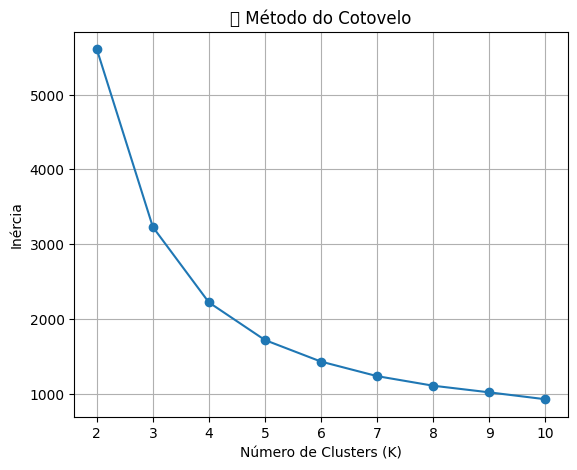

In [21]:
import matplotlib.pyplot as plt

# Cria um gráfico da inércia (para cada K testado)
plt.figure(figsize=(14, 5))  # Define o tamanho da figura (2 gráficos lado a lado)

plt.subplot(1, 2, 1)  # Primeiro gráfico: posição 1 de 2
plt.plot(K_range, inertia, marker='o')  # Linha conectando os pontos com bolinha em cada valor de K
plt.title("📉 Método do Cotovelo")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inércia")
plt.grid(True)


<ipython-input-22-a4541d0d2406>:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajusta o layout para os dois gráficos não se sobreporem
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


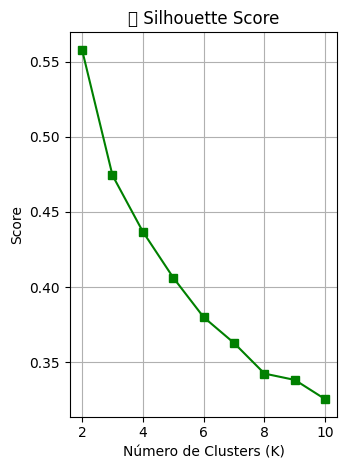

In [22]:
# Segundo gráfico: Silhouette Score
plt.subplot(1, 2, 2)  # Segundo gráfico: posição 2 de 2
plt.plot(K_range, silhouette_scores, marker='s', color='green')  # Linha verde com marcadores quadrados
plt.title("📈 Silhouette Score")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Score")
plt.grid(True)

plt.tight_layout()  # Ajusta o layout para os dois gráficos não se sobreporem
plt.show()          # Exibe os gráficos


## 🔍 Etapa 3 – Clusterização com KMeans

Nesta etapa aplicamos o algoritmo de clusterização **KMeans**, que tem como objetivo identificar padrões naturais nos dados **sem usar os rótulos de gênero**. O algoritmo agrupa os dados com base em similaridade (distância) entre os pontos de altura e peso já padronizados.

---

### 🔁 Testando diferentes valores de K

O KMeans exige que a gente defina **quantos clusters (K)** queremos formar. Como não sabemos a quantidade ideal, testamos K de **2 a 10**, e usamos duas métricas para nos ajudar a escolher o melhor:

1. **Inércia (Elbow Method):**
   - Mede o quão compactos estão os clusters
   - Quanto **menor**, melhor (mas cuidado com overfitting)
   - Procuramos um ponto de **“cotovelo”**, onde a melhoria começa a diminuir

2. **Silhouette Score:**
   - Mede o quão bem os clusters estão separados
   - Quanto mais próximo de **1**, melhor a separação
   - Um bom K mostra **separação clara entre os grupos**

---

### 📊 Resultados obtidos:

#### 📉 Elbow Method:
- A inércia caiu fortemente até **K = 3**, depois começou a achatar.
- O “cotovelo” da curva indica que **K = 3** ainda traz ganho, mas com menos intensidade.

#### 📈 Silhouette Score:
- O **maior score foi com K = 2** (acima de 0.55), indicando a melhor separação possível entre grupos.
- Após K = 2, o score **despenca** progressivamente, sinalizando piora na qualidade dos agrupamentos.

---

### ✅ Escolha final: **K = 2**

A escolha de **K = 2** foi baseada em:
- Melhor **Silhouette Score** (melhor separação entre os clusters)
- Faz sentido com o contexto real (existem dois gêneros: masculino e feminino)
- Simplicidade e interpretabilidade dos grupos

---

### 🧠 Conclusão:

Mesmo sem usar a variável `Gender`, o modelo KMeans conseguiu separar os dados em dois grupos bem definidos com base apenas na **altura e peso**.  
A próxima etapa será **aplicar o KMeans definitivo com `K = 2`**, salvar os rótulos gerados e analisar os resultados visualmente.


In [23]:
# Etapa 3.6 – Aplicação do KMeans final com K = 2
# Agora que escolhemos K=2, vamos rodar o modelo definitivo

kmeans_final = KMeans(n_clusters=2, random_state=42)  # Criamos o modelo com 2 clusters
kmeans_final.fit(X_scaled)  # Treinamos o modelo com os dados padronizados

KMeans(n_clusters=2, random_state=42)

In [24]:
# 📌 Adicionando os rótulos dos clusters ao DataFrame original
# Cada linha do DataFrame agora terá um valor (0 ou 1) indicando a qual cluster o ponto pertence
df['Cluster'] = kmeans_final.labels_

In [25]:
# 📍 Visualizando os centróides dos clusters no espaço padronizado
# Os centróides são os pontos médios de cada grupo
centroids = kmeans_final.cluster_centers_
print("📍 Coordenadas dos centróides (em escala padronizada):")
print(centroids)

📍 Coordenadas dos centróides (em escala padronizada):
[[ 0.72522044  0.75038382]
 [-0.89553736 -0.92661032]]


In [28]:
# 👁️ Visualizando algumas linhas com a coluna 'Cluster' adicionada
print("👀 Amostra de dados com o cluster atribuído:")
display(df[['Gender', 'Height', 'Weight', 'Cluster']].head(50))

👀 Amostra de dados com o cluster atribuído:


,Gender,Height,Weight,Cluster
0,Male,73.847017,241.893563,0
1,Male,68.781904,162.310473,0
2,Male,74.110105,212.740856,0
3,Male,71.730978,220.042470,0
4,Male,69.881796,206.349801,0
5,Male,67.253016,152.212156,1
6,Male,68.785081,183.927889,0
7,Male,68.348516,167.971111,0
8,Male,67.018950,175.929440,0
9,Male,63.456494,156.399676,1


In [30]:
# Contagem de gênero dentro de cada cluster
print("🔢 Distribuição de gênero por cluster:")
display(pd.crosstab(df['Cluster'], df['Gender'], normalize='index') * 100)

🔢 Distribuição de gênero por cluster:


Gender,Female,Male
Cluster,,
0,8.259212,91.740788
1,82.572398,17.427602


## 🧠 Etapa 4 – Interpretação dos Clusters Formados

Após aplicar o KMeans com `K = 2`, adicionamos a coluna `Cluster` ao DataFrame e analisamos a composição de cada grupo com base na variável real `Gender`.

---

### 📊 Análise da Distribuição de Gênero por Cluster

Realizamos uma tabela cruzada para verificar **qual proporção de homens e mulheres** foi atribuída a cada cluster:

| Cluster | % Female | % Male  |
|---------|----------|---------|
| 0       | 8.25%    | 91.74%  |
| 1       | 82.57%   | 17.43%  |

---

### 🧠 Interpretação

- O **Cluster 0** é composto **majoritariamente por homens** (mais de 91%)
- O **Cluster 1** é composto **principalmente por mulheres** (mais de 82%)

---

### ✅ Conclusão

Mesmo sem utilizar a variável `Gender` durante o treinamento, o algoritmo KMeans foi capaz de formar dois grupos **muito próximos da separação entre homens e mulheres** — utilizando apenas as variáveis numéricas **Height** e **Weight**.

Esse resultado confirma que:
- Existe uma **separação natural nos dados** baseada em características físicas
- O algoritmo foi **eficaz em detectar padrões reais** sem supervisão


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


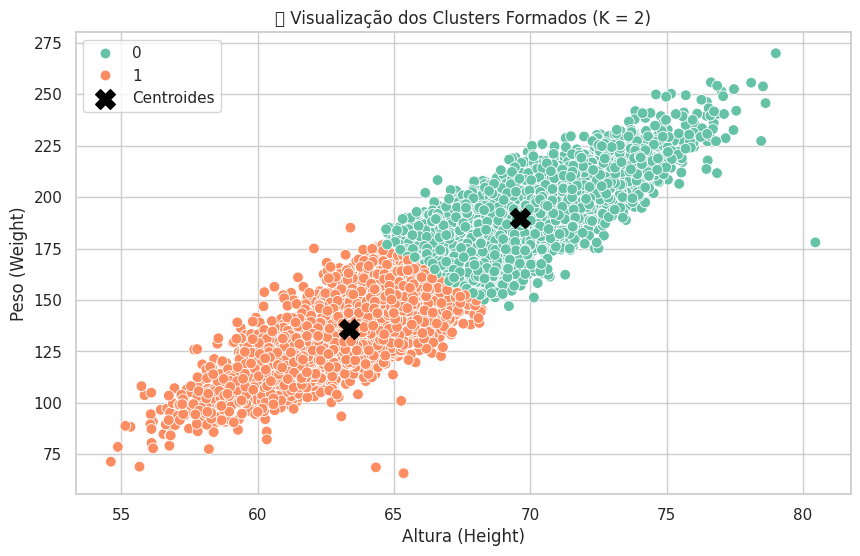

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🎨 Configurando o estilo visual
sns.set(style="whitegrid")

# 🎯 Gráfico de dispersão: altura vs peso, colorido por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='Height', y='Weight', hue='Cluster', palette='Set2', s=60
)

# 🔵 Adicionando os centróides (convertendo da escala padronizada de volta para a original)
centroids_original = scaler.inverse_transform(kmeans_final.cluster_centers_)

# Plotando os centróides no gráfico
plt.scatter(
    centroids_original[:, 0], centroids_original[:, 1],
    s=200, c='black', marker='X', label='Centroides'
)

# 🧾 Ajustes visuais do gráfico
plt.title("📊 Visualização dos Clusters Formados (K = 2)")
plt.xlabel("Altura (Height)")
plt.ylabel("Peso (Weight)")
plt.legend()
plt.show()


## 🎨 Etapa 5 – Visualização dos Clusters

Nesta etapa, criamos um gráfico de dispersão com as variáveis `Height` (Altura) e `Weight` (Peso), colorindo os dados de acordo com os **clusters formados pelo KMeans** com `K = 2`.

---

### 📊 Descrição do Gráfico:

- Cada ponto representa um indivíduo no dataset.
- A cor indica a qual **cluster (grupo)** o KMeans atribuiu aquele ponto:
  - **Cluster 0**: pontos em verde
  - **Cluster 1**: pontos em laranja
- Os marcadores `X` em preto representam os **centróides** de cada cluster, ou seja, a média de altura e peso de cada grupo.

---

### 🧠 Interpretação do Resultado:

- O gráfico mostra uma **divisão clara entre dois grupos**, alinhados na diagonal crescente de altura e peso.
- O **Cluster 0 (verde)** contém a maioria dos indivíduos com **maior peso e altura** — o que corresponde visualmente ao grupo de **homens**.
- O **Cluster 1 (laranja)** agrupa pessoas com **menor altura e peso**, condizente com o grupo de **mulheres**.
- A posição dos centróides reforça essa separação, localizando-se no "centro" de cada grupo distinto.

---

### ✅ Conclusão Visual:

A visualização confirma que o modelo KMeans foi capaz de **detectar uma divisão natural no espaço de altura e peso**, formando dois grupos coerentes e bem separados.  
Este resultado **valida a eficácia do clustering não supervisionado** para esse problema, mesmo sem usar o rótulo `Gender` como entrada no modelo.

